# Quantitative Analysis of Price & Daily Returns
* Do daily price fluctuations follow predictable statistical patterns?

* Is there measurable momentum or mean-reversion in the asset's movements?

* Can we model the security's path as statistically independent increments?

### 1. Set up environment 

In [2]:
!pip install yfinance

  Using cached yfinance-0.2.65-py2.py3-none-any.whl (119 kB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()
import yfinance as yf

In [4]:
print(yf.__version__)

0.2.65


### 2.  Download stock price data, store in dataframe

In [6]:
# Define the ticker symbol, start date, and end date
tickerSymbol = 'AMZN'  # Example: Amazon
start_date = '2020-01-01'
end_date = '2024-12-31'

# Get data
amzn = yf.download(tickerSymbol, start=start_date, end=end_date)

# Print the first few rows of the downloaded data
print(amzn.head())

C:\Users\muham\AppData\Local\Temp\ipykernel_34684\4280695795.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amzn = yf.download(tickerSymbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2020-01-02  94.900497  94.900497  93.207497  93.750000  80580000
2020-01-03  93.748497  94.309998  93.224998  93.224998  75288000
2020-01-06  95.143997  95.184502  93.000000  93.000000  81236000
2020-01-07  95.343002  95.694504  94.601997  95.224998  80898000
2020-01-08  94.598503  95.550003  94.321999  94.902000  70160000


### 3. Take a look at the data

In [7]:
amzn.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000


### 4. Store instantaneous rate of return in a different time series

In [8]:
amzn_return = round(np.log(amzn.Close).diff() * 100, 2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Ticker,AMZN
Date,
2020-01-03,-1.22
2020-01-06,1.48
2020-01-07,0.21
2020-01-08,-0.78
2020-01-09,0.48


### 5. Plot 

<AxesSubplot:xlabel='Date'>

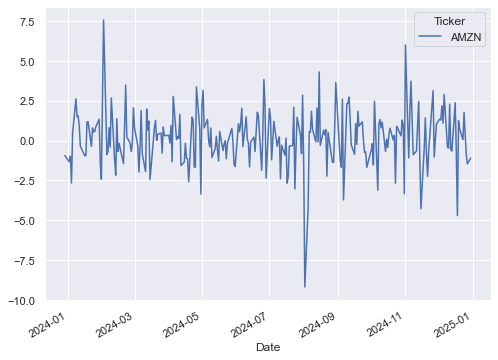

In [10]:
amzn_return[-252:].plot()

### 6. Descriptive Statistics 

In [11]:
amzn_return.describe()

Ticker,AMZN
count,1256.000000
mean,0.067444
std,2.265853
min,-15.140000
25%,-1.112500
50%,0.080000
75%,1.290000
max,12.690000


### 7. Scipy statistics as comparison

In [12]:
from scipy import stats

In [13]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

### 9. Random numbers for Normal distribution


In [14]:
from scipy.stats import norm

In [15]:
x = norm.rvs(mean, std, n)

In [16]:
stats.describe(x)

DescribeResult(nobs=1256, minmax=(-7.750145558873684, 6.746502222310308), mean=0.10754482326124638, variance=5.0829875552367625, skewness=-0.044638592361590575, kurtosis=-0.022073063541542037)

(array([  2.,   5.,  16.,  24.,  59., 117., 174., 209., 197., 187., 130.,
         75.,  35.,  21.,   5.]),
 array([-7.75014556, -6.78370237, -5.81725919, -4.850816  , -3.88437282,
        -2.91792963, -1.95148645, -0.98504326, -0.01860008,  0.94784311,
         1.9142863 ,  2.88072948,  3.84717267,  4.81361585,  5.78005904,
         6.74650222]),
 <BarContainer object of 15 artists>)

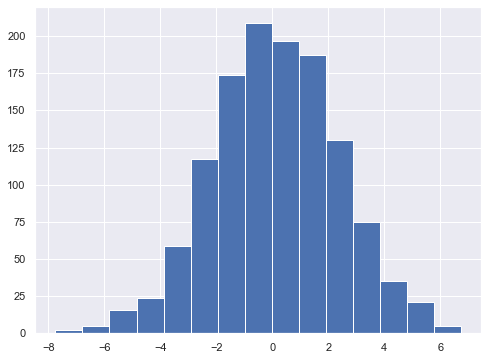

In [17]:
plt.hist(x, bins=15)

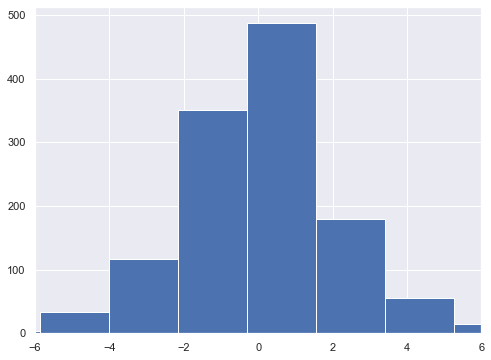

In [18]:
plt.hist(amzn_return, bins = 15)
plt.xlim(-6,6);

## Do daily price fluctuations follow predicatable statistical patterns?

### 10. Test kurtosistest

In [19]:
# 10. Use scipy stats to test the kurtosis
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return.values.flatten())  # Convert to 1D array

def format_test_result(name, test_result):
    return f"{name}: {test_result.statistic:>10.2f}{test_result.pvalue:>15.4f}"

print(f'{"Test statistic":>17}{"p-value":>16}')
print('-'*33)
print(format_test_result("x", x_test))
print(format_test_result("AMZN", amzn_test))

   Test statistic         p-value
---------------------------------
x:      -0.06         0.9517
AMZN:      11.09         0.0000


In [20]:
print(f'{"Test statistic":>20}{"p-value":>15}')
print('-'*35)
print(f"x: {x_test.statistic:>17.2f}{x_test.pvalue:16.4f}")
print(f"AMZN: {amzn_test.statistic:>13.2f}{amzn_test.pvalue:16.4f}")

      Test statistic        p-value
-----------------------------------
x:             -0.06          0.9517
AMZN:         11.09          0.0000


### 11. Histogram with Normal curve overlay


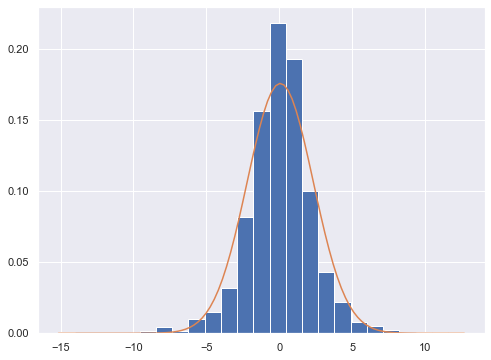

In [21]:
plt.hist(amzn_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

### 12. Amazon price change compared to normal curve

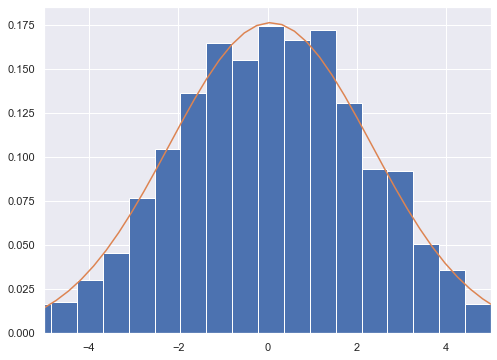

In [22]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

## Is there a measurable momentum or mean-reversion in asset's movements?

### 13. Conduct simple hypothesis test

In [23]:
len(amzn_return)

1256

In [24]:
stats.ttest_1samp(amzn_return.sample(252, replace = True), 0, alternative='two-sided')

Ttest_1sampResult(statistic=array([0.70008423]), pvalue=array([0.48452307]))

## Can we model the security's path as independent increments?

### 14. Create price lags

In [26]:
# Convert the DataFrame into a Series (assuming the numbers are the closing prices)
amzn_close = pd.DataFrame({'Close': amzn.Close.iloc[:, 0]})  # Takes the first column's values
amzn_close['lag_1'] = amzn_close['Close'].shift(1)
amzn_close['lag_2'] = amzn_close['Close'].shift(2)
amzn_close.dropna(inplace=True)
print(amzn_close.head())

                Close      lag_1      lag_2
Date                                       
2020-01-06  95.143997  93.748497  94.900497
2020-01-07  95.343002  95.143997  93.748497
2020-01-08  94.598503  95.343002  95.143997
2020-01-09  95.052498  94.598503  95.343002
2020-01-10  94.157997  95.052498  94.598503


### 15. Fit linear model

In [27]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [28]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [29]:
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2020-01-06,95.143997,93.748497,94.900497,93.812330
2020-01-07,95.343002,95.143997,93.748497,95.172297
2020-01-08,94.598503,95.343002,95.143997,95.388424
2020-01-09,95.052498,94.598503,95.343002,94.656970
2020-01-10,94.157997,95.052498,94.598503,95.094145


In [30]:
print(amzn_close.index.dtype)  # Should show datetime64[ns]
print(amzn_close.index.min(), amzn_close.index.max())  # Check date range

datetime64[ns]
2020-01-06 00:00:00 2024-12-30 00:00:00


<AxesSubplot:xlabel='Date'>

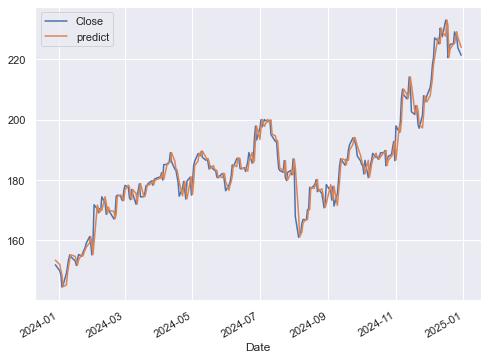

In [31]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()